In [1]:
# Loading all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.model_selection import GridSearchCV


import gc
# enable garbage collector to aid in memory 
gc.enable()

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading dataset from data file
loan_df = pd.read_csv('Loan_Modelling.csv')
loan_df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### EDA of Loan dataframe

In [3]:
# Basic information about the dataframe
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
# Getting the summary of loan df
loan_df.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [5]:
loan_df.drop("ID", axis=1, inplace=True)

Removed non-informative columns from the dataset

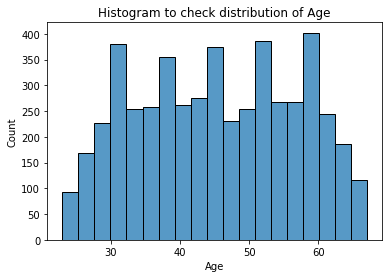

In [6]:
# Histogram of variable Age
ax = sns.histplot(x = 'Age',  data=loan_df)
ax.set_title('Histogram to check distribution of Age')
plt.show()

Age of customer is distriuted noramlly across all the age groups

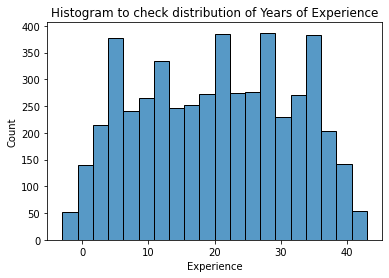

In [7]:
# Histogram of variable Experience
ax = sns.histplot(x = 'Experience',  data=loan_df)
ax.set_title('Histogram to check distribution of Years of Experience')
plt.show()

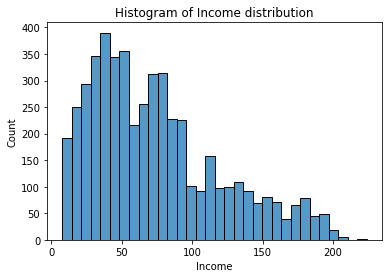

In [8]:
# Histogram of variable Income
ax = sns.histplot(x = 'Income',  data=loan_df)
ax.set_title('Histogram of Income distribution')
plt.show()

Income of customers are following a right skewed normal distribution curve. There are potential customers with all kind of income slabs for personal loans.

1    1472
2    1296
3    1010
4    1222
Name: Family, dtype: int64


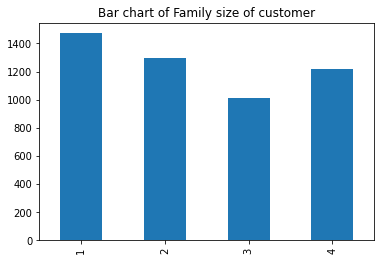

In [9]:
# Table and bar chart of variable Family
tb=loan_df['Family'].value_counts().sort_index()
print(tb)
ax = tb.plot(kind='bar')
ax.set_title('Bar chart of Family size of customer')
plt.show()


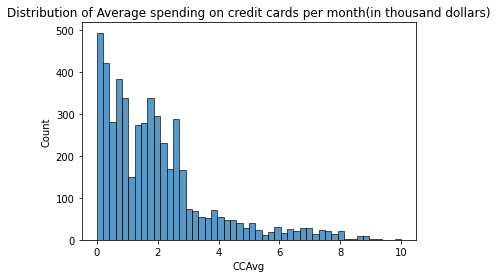

In [10]:
# Histogram of variable CCAvg
ax = sns.histplot(x = 'CCAvg',  data=loan_df)
ax.set_title('Distribution of Average spending on credit cards per month(in thousand dollars)')
plt.show()

Customer's average spending on credit cards per month is making a right-skewed normal distribution curve.

1    2096
2    1403
3    1501
Name: Education, dtype: int64


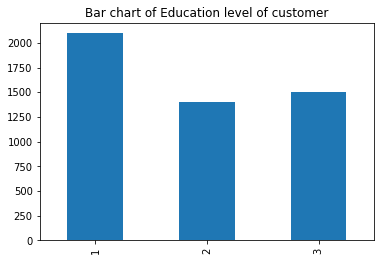

In [11]:
# Table and bar chart of Education level of customers
tb=loan_df['Education'].value_counts().sort_index()
print(tb)
ax = tb.plot(kind='bar')
ax.set_title('Bar chart of Education level of customer')
plt.show()


0    4520
1     480
Name: Personal_Loan, dtype: int64


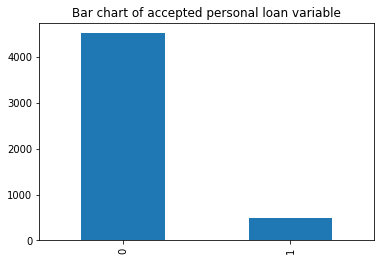

In [12]:
# Table and bar chart of Personal loan accepted count
tb=loan_df['Personal_Loan'].value_counts().sort_index()
print(tb)
ax = tb.plot(kind='bar')
ax.set_title('Bar chart of accepted personal loan variable')
plt.show()


Around 10% of the customers have already accepted the personal loan offers in the present data.

0    4478
1     522
Name: Securities_Account, dtype: int64


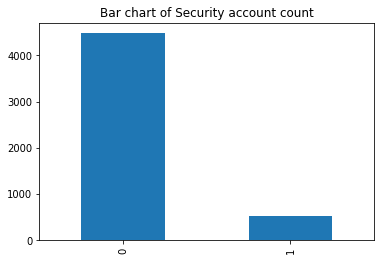

In [13]:
# Table and bar chart of Security account count
tb=loan_df['Securities_Account'].value_counts().sort_index()
print(tb)
ax = tb.plot(kind='bar')
ax.set_title('Bar chart of Security account count')
plt.show()


0    4698
1     302
Name: CD_Account, dtype: int64


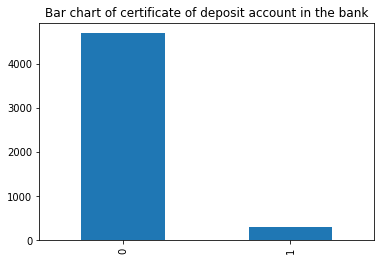

In [14]:
# Table and bar chart of certificate of deposit account
tb=loan_df['CD_Account'].value_counts().sort_index()
print(tb)
ax = tb.plot(kind='bar')
ax.set_title('Bar chart of certificate of deposit account in the bank')
plt.show()


0    2016
1    2984
Name: Online, dtype: int64


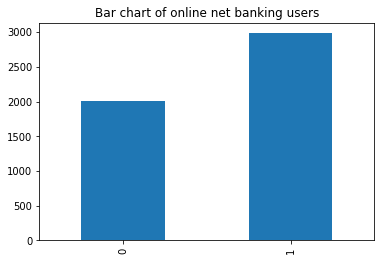

In [15]:
# Table and bar chart of Online net banking users count
tb=loan_df['Online'].value_counts().sort_index()
print(tb)
ax = tb.plot(kind='bar')
ax.set_title('Bar chart of online net banking users')
plt.show()


0    3530
1    1470
Name: CreditCard, dtype: int64


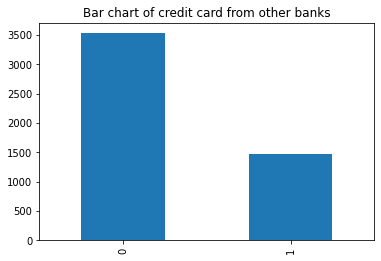

In [16]:
# Table and bar chart of credit card from other banks
tb=loan_df['CreditCard'].value_counts().sort_index()
print(tb)
ax = tb.plot(kind='bar')
ax.set_title('Bar chart of credit card from other banks')
plt.show()


Around 30% of the customers are using other bank's credit card. We can target this population to use our bank's credit card and can provide offers on personal loans.

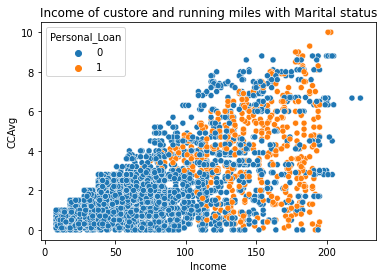

In [17]:
# Scatterplot of income vs credit usage of customer coloured with personal loans
ax=sns.scatterplot(x='Income', y='CCAvg', hue='Personal_Loan', data=loan_df)
ax.set_title("Income of custore and running miles with Marital status")
plt.show()

Most of the issued personal loans customers are high income and high credit spending customers. We can target the remaing people from the similar population for personal loan offers.

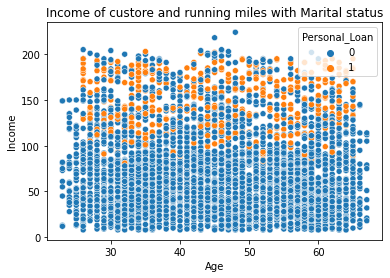

In [18]:
# Scatterplot of income vs credit usage of customer coloured with personal loans
ax=sns.scatterplot(x='Age', y='Income', hue='Personal_Loan', data=loan_df)
ax.set_title("Income of custore and running miles with Marital status")
plt.show()

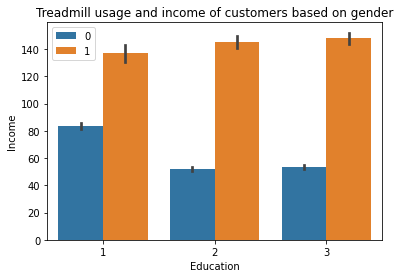

In [19]:
# Bar chart of treadmill usage and income of customers based on gender
ax = sns.barplot(x = "Education", y = 'Income', hue = 'Personal_Loan', data=loan_df)
ax.set_title('Treadmill usage and income of customers based on gender')
ax.legend(loc='upper left')
plt.show()

### Data Pre-processing

In [20]:
# Correlation plot of all the features
loan_df.corr().style.background_gradient(cmap='BrBG_r')

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.030530,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.030456,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.030709,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIPCode,-0.030530,-0.030456,-0.030709,1.000000,0.027512,-0.012188,-0.008266,0.003614,-0.002974,0.002422,0.021671,0.028317,0.024033
Family,-0.046418,-0.052563,-0.157501,0.027512,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.012188,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,-0.008266,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,0.003614,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal_Loan,-0.007726,-0.007413,0.502462,-0.002974,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities_Account,-0.000436,-0.001232,-0.002616,0.002422,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


No highly correlated features found among the columns.

In [21]:
#Checking for missing values
loan_df.isnull().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

No missing values are present in the dataset.

In [22]:
# Splitting the dataset into training and testing
y_feature = loan_df['Personal_Loan']
x_features = loan_df.drop(['Personal_Loan'], axis=1)
features = np.array(x_features.columns)

X_train, X_test, y_train, y_test = train_test_split(x_features, y_feature, test_size=0.2, random_state=10)

In [23]:
#Scaling the dataset using standard scaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

### Machine Learning and Modelling

#### Logistic Model baseline

In [24]:
# Building a logistic regression model using sklearn
logreg = LogisticRegressionCV(cv=5).fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [25]:
# Logistic regression coefficients 
data = np.array([logreg.coef_, features])
print(data)

[array([[-0.16386995,  0.23966182,  2.33659857, -0.00963779,  0.74516258,
         0.23493912,  1.30132713,  0.04411761, -0.23291782,  0.86238766,
        -0.29426723, -0.49065171]])
 array(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities_Account', 'CD_Account',
       'Online', 'CreditCard'], dtype=object)]


The coefficient value signifies that how much the mean of personal loan variable changes given a unit change in the independent variables holding the other variables constant. In our baseline logistic model, Income, Education, Mortgage have high positive impact on personal loans. Whereas Online status, Securities Account and Age has negative impact on the personal loan.

In [26]:
# Making a classification report of the model for test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       907
           1       0.81      0.60      0.69        93

    accuracy                           0.95      1000
   macro avg       0.89      0.79      0.83      1000
weighted avg       0.95      0.95      0.95      1000



The model gives an accuracy score of 0.97 on the test set, however since the personal loan data has imbalance of 1's and 0's, we need to look for recall and f1-score for model performance. The weighted f1-score of the model came out to be 0.97.

#### Decision tree baseline

In [27]:
# Building a logistic regression model using sklearn
clf = DecisionTreeClassifier(random_state=10)
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [28]:
# Making a classification report of the model for test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       907
           1       0.89      0.89      0.89        93

    accuracy                           0.98      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.98      0.98      0.98      1000



The model gives an accuracy score of 0.97, and the weighted f1-score of the model came out to be 0.97 on the test set. The decision tree performed similar with logistic model. 

In [29]:
# Calculating decision tree feature importance
importance = np.round(clf.feature_importances_, 4)
data = pd.DataFrame([features, importance], index=['features', 'importance'])
data

,0,1,2,3,4,5,6,7,8,9,10,11
features,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
importance,0.0078,0.0241,0.3112,0.0231,0.1688,0.0531,0.3801,0.004,0.0012,0.0236,0.0,0.0032


The above dataframe shows the impact of each feature on the prediction of personal loan. The decision tree shows that Education, income,  and family size has the most imapct on the model.

#### Hyperparameter Tunning : Logistic Regression

We will perform a hyper parameter tunning on the baseline model to improve performace and avoid overfitting. Through parameter tunning we will find the best parameters for the best model. This step requires harware resources and takes time, but it might improve the performance of the baseline model.

In [30]:
logit = LogisticRegression()

# Create hyperparameter options
params = dict(C= np.logspace(-2, 4, 40), penalty=['l1', 'l2'])

# Create grid search using 5-fold cross validation
clf = GridSearchCV(logit, params, cv=5, verbose=1 )

# Fit grid search
best_model = clf.fit(X_train, y_train)


Fitting 5 folds for each of 80 candidates, totalling 400 fits


In [31]:
print("Best parameters from gridsearch: {}\n".format(best_model.best_params_))
print("CV score=%0.3f\n" % clf.best_score_)
cv_results = clf.cv_results_

Best parameters from gridsearch: {'C': 0.1193776641714437, 'penalty': 'l2'}

CV score=0.950



In [32]:
# Predict target vector
y_pred = best_model.predict(X_test)

# Making a classification report of the model for test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       907
           1       0.83      0.59      0.69        93

    accuracy                           0.95      1000
   macro avg       0.90      0.79      0.83      1000
weighted avg       0.95      0.95      0.95      1000



The accuracy resulted from the logistic model came out to e 0.95 and the weighted f1-score is 0.95, which is less than the baseline overfitted model, but now the model has generallized better and the score difference is not too much.

#### Hyperparameter Tunning : Decision Tree

In [33]:
# Hyperparameters tunning settings
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001, .005],
              'max_depth' : np.arange(10),
              'criterion' :['gini', 'entropy']
             }

# Building a decision tree with tunned parameters
tree_clas = DecisionTreeClassifier(random_state=10)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=0)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=10),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001, 0.005],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [34]:
# Best model parameters
final_model = grid_search.best_estimator_
final_model

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=8, max_features='auto',
                       random_state=10)

In [35]:
# Perdiction from best decision tree model
y_pred = final_model.predict(X_test)

In [36]:
# Making a classification report of the model for test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       907
           1       0.82      0.85      0.84        93

    accuracy                           0.97      1000
   macro avg       0.90      0.92      0.91      1000
weighted avg       0.97      0.97      0.97      1000



The accuracy resulted from the decistion tree model came out to be 0.97 with the weighted f1-score of 0.97, which is better than the generalized logistic regression model. Hence, we will pick the decision tree final model for the predictions of personal loans.

In [37]:
# Calculating decision tree feature importance
importance = np.round(final_model.feature_importances_, 4)
data = pd.DataFrame([features, importance], index=['features', 'importance'])
data

,0,1,2,3,4,5,6,7,8,9,10,11
features,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
importance,0.0,0.0,0.7018,0.0078,0.0763,0.0437,0.0601,0.0812,0.0,0.0291,0.0,0.0


The best model by decision tree shows that the income of customers plays a very important role while considering personal loans. It contributed 70% in the prediction of personal loan accaptance rate. Hence, the bank can target customers with high income with personalized offers and benefits to get personal loan approval from them. 
Furthermore, Family size and education level also plays an important role while making the personal loan decision, so this should be considered during the campaign.

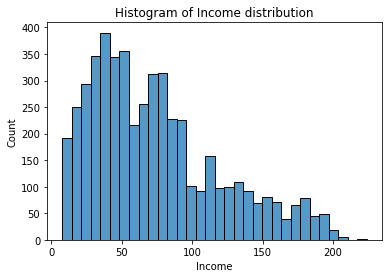

In [38]:
# Histogram of variable Income
ax = sns.histplot(x = 'Income',  data=loan_df)
ax.set_title('Histogram of Income distribution')
plt.show()

Above is the plot of customer's income distribution. The higher income segment can be found easily and can be targated by personalized advertisement in the campaign.